## ENDER implementation runtime testing
### Test done on the endometriosis dataset

6 versions:
- basic Python (Base)
- compiled basic Python (-)
- modified for Cython (Modified)
- modified for Cython with parallelism (ModifiedPara)
- cythonized and using the lower bound (BoundedFast)
- cythonized and using the lower bound and parallelism (BoundedFastPara)

Every version also tested in 2 variants, either using just the gradient, or the gradient and the hessian to calculate the risk

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/iwama/Desktop/Osobiste/MSc/put-msc/Endometriosis/endometriosis.csv")
X = df.drop(columns=['target'])
y = df['target'].astype('int')
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=4, random_state=42, stratify=y)

In [3]:
from EnderClassifierBase import EnderClassifier as ECBase
from EnderClassifier import EnderClassifier as EC
from EnderClassifierModified import EnderClassifier as ECM
from EnderClassifierModifiedPara import EnderClassifier as ECMP
from EnderClassifierBoundedFast import EnderClassifier as ECBF
from EnderClassifierBoundedFastPara import EnderClassifier as ECBFP

print(X_train.shape, y_train.shape)
N_RULES = 50

(870, 85) (870,)


The test is to see how long it takes to train 50 rules on the same data.

In [ ]:
ecbaseTrueTimes = []
ecbaseTrueTotalTimes = []
ecbaseTrueTotal = 0
runtimes = []
for i in range(5):
    ecbaseTrue = ECBase(verbose=False, n_rules=N_RULES, use_gradient=True)
    times, totalTimes, total = ecbaseTrue.fit(X_train, y_train)
    ecbaseTrueTimes.append(times)
    ecbaseTrueTotalTimes.append(totalTimes)
    runtimes.append(total)
    ecbaseTrueTotal += total
ecbaseTrueTimes = np.mean(np.array(ecbaseTrueTimes), axis=0)
ecbaseTrueTotalTimes = np.mean(np.array(ecbaseTrueTotalTimes), axis=0)
ecbaseTrueTotalStd = np.std(np.array(runtimes))
ecbaseTrueTotal = ecbaseTrueTotal / 5.0

KeyboardInterrupt: 

In [ ]:
ecbaseFalseTimes = []
ecbaseFalseTotalTimes = []
ecbaseFalseTotal = 0
runtimes = []
for i in range(5):
    ecbaseFalse = ECBase(verbose=False, n_rules=N_RULES, use_gradient=False)
    times, totalTimes, total = ecbaseFalse.fit(X_train, y_train)
    ecbaseFalseTimes.append(times)
    ecbaseFalseTotalTimes.append(totalTimes)
    runtimes.append(total)
    ecbaseFalseTotal += total
ecbaseFalseTimes = np.mean(np.array(ecbaseFalseTimes), axis=0)
ecbaseFalseTotalTimes = np.mean(np.array(ecbaseFalseTotalTimes), axis=0)
ecbaseFalseTotalStd = np.std(np.array(runtimes))
ecbaseFalseTotal = ecbaseFalseTotal / 5.0

In [ ]:
ecTrueTimes = []
ecTrueTotalTimes = []
ecTrueTotal = 0
runtimes = []
for i in range(5):
    ecTrue = EC(verbose=False, n_rules=N_RULES, use_gradient=True)
    times, totalTimes, total = ecTrue.fit(X_train, y_train)
    ecTrueTimes.append(times)
    ecTrueTotalTimes.append(totalTimes)
    runtimes.append(total)
    ecTrueTotal += total
ecTrueTimes = np.mean(np.array(ecTrueTimes), axis=0)
ecTrueTotalTimes = np.mean(np.array(ecTrueTotalTimes), axis=0)
ecTrueTotalStd = np.std(np.array(runtimes))
ecTrueTotal = ecTrueTotal / 5.0

In [ ]:
ecFalseTimes = []
ecFalseTotalTimes = []
ecFalseTotal = 0
runtimes = []
for i in range(5):
    ecFalse = EC(verbose=False, n_rules=N_RULES, use_gradient=False)
    times, totalTimes, total = ecFalse.fit(X_train, y_train)
    ecFalseTimes.append(times)
    ecFalseTotalTimes.append(totalTimes)
    runtimes.append(total)
    ecFalseTotal += total
ecFalseTimes = np.mean(np.array(ecFalseTimes), axis=0)
ecFalseTotalTimes = np.mean(np.array(ecFalseTotalTimes), axis=0)
ecFalseTotalStd = np.std(np.array(runtimes))
ecFalseTotal = ecFalseTotal / 5.0

In [ ]:
ecmTrueTimes = []
ecmTrueTotalTimes = []
ecmTrueTotal = 0
runtimes = []
for i in range(5):
    ecmTrue = ECM(verbose=False, n_rules=N_RULES, use_gradient=True)
    times, totalTimes, total = ecmTrue.fit(X_train, y_train)
    ecmTrueTimes.append(times)
    ecmTrueTotalTimes.append(totalTimes)
    runtimes.append(total)
    ecmTrueTotal += total
ecmTrueTimes = np.mean(np.array(ecmTrueTimes), axis=0)
ecmTrueTotalTimes = np.mean(np.array(ecmTrueTotalTimes), axis=0)
ecmTrueTotalStd = np.std(np.array(runtimes))
ecmTrueTotal = ecmTrueTotal / 5.0

In [ ]:
ecmFalseTimes = []
ecmFalseTotalTimes = []
ecmFalseTotal = 0
runtimes = []
for i in range(5):
    ecmFalse = ECM(verbose=False, n_rules=N_RULES, use_gradient=False)
    times, totalTimes, total = ecmFalse.fit(X_train, y_train)
    ecmFalseTimes.append(times)
    ecmFalseTotalTimes.append(totalTimes)
    runtimes.append(total)
    ecmFalseTotal += total
ecmFalseTimes = np.mean(np.array(ecmFalseTimes), axis=0)
ecmFalseTotalTimes = np.mean(np.array(ecmFalseTotalTimes), axis=0)
ecmFalseTotalStd = np.std(np.array(runtimes))
ecmFalseTotal = ecmFalseTotal / 5.0

In [ ]:
ecmpTrueTimes = []
ecmpTrueTotalTimes = []
ecmpTrueTotal = 0
runtimes = []
for i in range(5):
    ecmpTrue = ECMP(verbose=False, n_rules=N_RULES, use_gradient=True)
    times, totalTimes, total = ecmpTrue.fit(X_train, y_train)
    ecmpTrueTimes.append(times)
    ecmpTrueTotalTimes.append(totalTimes)
    runtimes.append(total)
    ecmpTrueTotal += total
ecmpTrueTimes = np.mean(np.array(ecmpTrueTimes), axis=0)
ecmpTrueTotalTimes = np.mean(np.array(ecmpTrueTotalTimes), axis=0)
ecmpTrueTotalStd = np.std(np.array(runtimes))
ecmpTrueTotal = ecmpTrueTotal / 5.0

In [ ]:
ecmpFalseTimes = []
ecmpFalseTotalTimes = []
ecmpFalseTotal = 0
runtimes = []
for i in range(5):
    ecmpFalse = ECMP(verbose=False, n_rules=N_RULES, use_gradient=False)
    times, totalTimes, total = ecmpFalse.fit(X_train, y_train)
    ecmpFalseTimes.append(times)
    ecmpFalseTotalTimes.append(totalTimes)
    runtimes.append(total)
    ecmpFalseTotal += total
ecmpFalseTimes = np.mean(np.array(ecmpFalseTimes), axis=0)
ecmpFalseTotalTimes = np.mean(np.array(ecmpFalseTotalTimes), axis=0)
ecmpFalseTotalStd = np.std(np.array(runtimes))
ecmpFalseTotal = ecmpFalseTotal / 5.0

In [ ]:
ecbfTrueTimes = []
ecbfTrueTotalTimes = []
ecbfTrueTotal = 0
runtimes = []
for i in range(5):
    ecbfTrue = ECBF(verbose=False, n_rules=N_RULES, use_gradient=True)
    times, totalTimes, total = ecbfTrue.fit(X_train, y_train)
    ecbfTrueTimes.append(times)
    ecbfTrueTotalTimes.append(totalTimes)
    runtimes.append(total)
    ecbfTrueTotal += total
ecbfTrueTimes = np.mean(np.array(ecbfTrueTimes), axis=0)
ecbfTrueTotalTimes = np.mean(np.array(ecbfTrueTotalTimes), axis=0)
ecbfTrueTotalStd = np.std(np.array(runtimes))
ecbfTrueTotal = ecbfTrueTotal / 5.0

In [ ]:
ecbfFalseTimes = []
ecbfFalseTotalTimes = []
ecbfFalseTotal = 0
runtimes = []
for i in range(5):
    ecbfFalse = ECBF(verbose=False, n_rules=N_RULES, use_gradient=False)
    times, totalTimes, total = ecbfFalse.fit(X_train, y_train)
    ecbfFalseTimes.append(times)
    ecbfFalseTotalTimes.append(totalTimes)
    runtimes.append(total)
    ecbfFalseTotal += total
ecbfFalseTimes = np.mean(np.array(ecbfFalseTimes), axis=0)
ecbfFalseTotalTimes = np.mean(np.array(ecbfFalseTotalTimes), axis=0)
ecbfFalseTotalStd = np.std(np.array(runtimes))
ecbfFalseTotal = ecbfFalseTotal / 5.0

In [ ]:
ecbfpTrueTimes = []
ecbfpTrueTotalTimes = []
ecbfpTrueTotal = 0
runtimes = []
for i in range(5):
    ecbfpTrue = ECBFP(verbose=False, n_rules=N_RULES, use_gradient=True)
    times, totalTimes, total = ecbfpTrue.fit(X_train, y_train)
    ecbfpTrueTimes.append(times)
    ecbfpTrueTotalTimes.append(totalTimes)
    runtimes.append(total)
    ecbfpTrueTotal += total
ecbfpTrueTimes = np.mean(np.array(ecbfpTrueTimes), axis=0)
ecbfpTrueTotalTimes = np.mean(np.array(ecbfpTrueTotalTimes), axis=0)
ecbfpTrueTotalStd = np.std(np.array(runtimes))
ecbfpTrueTotal = ecbfpTrueTotal / 5.0

In [ ]:
ecbfpFalseTimes = []
ecbfpFalseTotalTimes = []
ecbfpFalseTotal = 0
runtimes = []
for i in range(5):
    ecbfpFalse = ECBFP(verbose=False, n_rules=N_RULES, use_gradient=False)
    times, totalTimes, total = ecbfpFalse.fit(X_train, y_train)
    ecbfpFalseTimes.append(times)
    ecbfpFalseTotalTimes.append(totalTimes)
    runtimes.append(total)
    ecbfpFalseTotal += total
ecbfpFalseTimes = np.mean(np.array(ecbfpFalseTimes), axis=0)
ecbfpFalseTotalTimes = np.mean(np.array(ecbfpFalseTotalTimes), axis=0)
ecbfpFalseTotalStd = np.std(np.array(runtimes))
ecbfpFalseTotal = ecbfpFalseTotal / 5.0

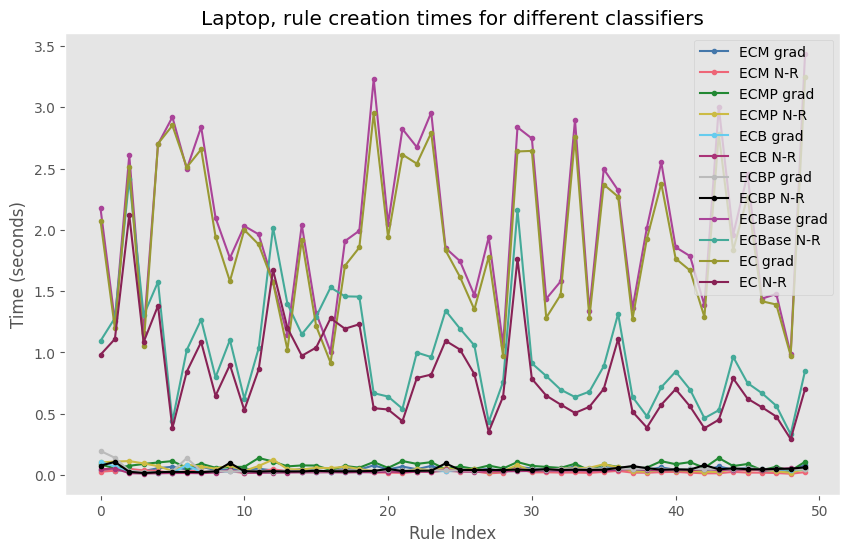

In [ ]:
# plot the Rule creation times
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[
    "#4477AA", "#EE6677", "#228833", "#CCBB44",
    "#66CCEE", "#AA3377", "#BBBBBB", "#000000",
    "#AA4499", "#44AA99", "#999933", "#882255"
])
plt.figure(figsize=(10, 6))
plt.plot(ecmTrueTimes, label='ECM grad', marker='.')
plt.plot(ecmFalseTimes, label='ECM N-R', marker='.')
plt.plot(ecmpTrueTimes, label='ECMP grad', marker='.')
plt.plot(ecmpFalseTimes, label='ECMP N-R', marker='.')
plt.plot(ecbfTrueTimes, label='ECB grad', marker='.')
plt.plot(ecbfFalseTimes, label='ECB N-R', marker='.')
plt.plot(ecbfpTrueTimes, label='ECBP grad', marker='.')
plt.plot(ecbfpFalseTimes, label='ECBP N-R', marker='.')
plt.plot(ecbaseTrueTimes, label='ECBase grad', marker='.')
plt.plot(ecbaseFalseTimes, label='ECBase N-R', marker='.')
plt.plot(ecTrueTimes, label='EC grad', marker='.')
plt.plot(ecFalseTimes, label='EC N-R', marker='.')
plt.legend()
plt.xlabel('Rule Index')
plt.ylabel('Time (seconds)')
plt.title('Laptop, rule creation times for different classifiers')
plt.grid()
plt.show()

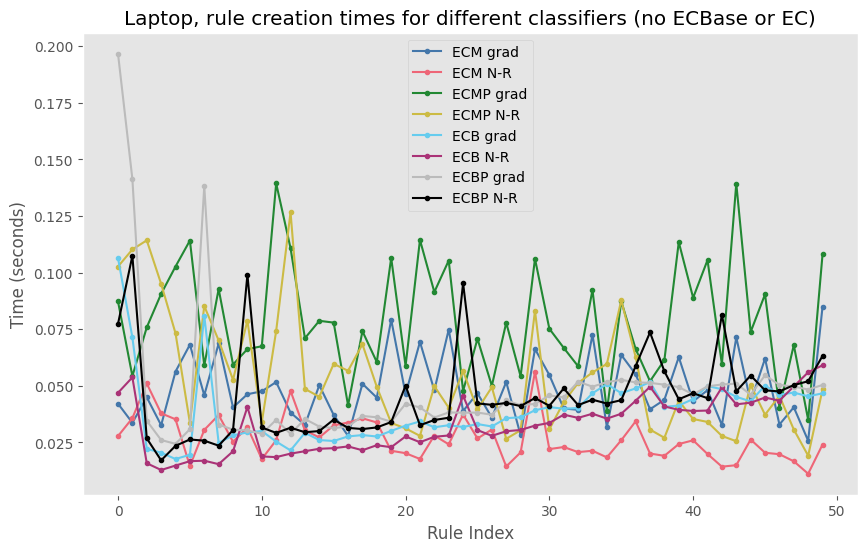

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(ecmTrueTimes, label='ECM grad', marker='.')
plt.plot(ecmFalseTimes, label='ECM N-R', marker='.')
plt.plot(ecmpTrueTimes, label='ECMP grad', marker='.')
plt.plot(ecmpFalseTimes, label='ECMP N-R', marker='.')
plt.plot(ecbfTrueTimes, label='ECB grad', marker='.')
plt.plot(ecbfFalseTimes, label='ECB N-R', marker='.')
plt.plot(ecbfpTrueTimes, label='ECBP grad', marker='.')
plt.plot(ecbfpFalseTimes, label='ECBP N-R', marker='.')
plt.legend()
plt.xlabel('Rule Index')
plt.ylabel('Time (seconds)')
plt.title('Laptop, rule creation times for different classifiers (no ECBase or EC)')
plt.grid()
plt.show()

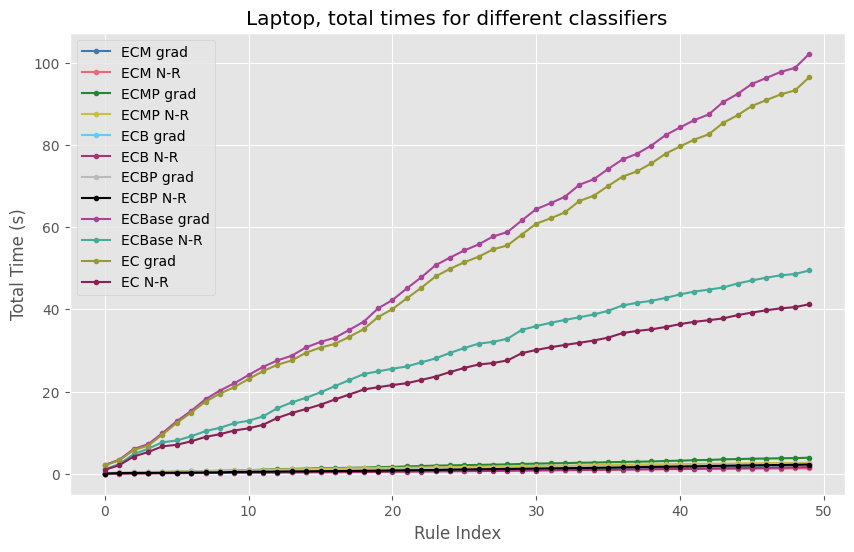

In [ ]:
# same plot but for total times
plt.figure(figsize=(10, 6))
plt.plot(ecmTrueTotalTimes, label='ECM grad', marker='.')
plt.plot(ecmFalseTotalTimes, label='ECM N-R', marker='.')
plt.plot(ecmpTrueTotalTimes, label='ECMP grad', marker='.')
plt.plot(ecmpFalseTotalTimes, label='ECMP N-R', marker='.')
plt.plot(ecbfTrueTotalTimes, label='ECB grad', marker='.')
plt.plot(ecbfFalseTotalTimes, label='ECB N-R', marker='.')
plt.plot(ecbfpTrueTotalTimes, label='ECBP grad', marker='.')
plt.plot(ecbfpFalseTotalTimes, label='ECBP N-R', marker='.')
plt.plot(ecbaseTrueTotalTimes, label='ECBase grad', marker='.')
plt.plot(ecbaseFalseTotalTimes, label='ECBase N-R', marker='.')
plt.plot(ecTrueTotalTimes, label='EC grad', marker='.')
plt.plot(ecFalseTotalTimes, label='EC N-R', marker='.')
plt.legend()
plt.xlabel('Rule Index')
plt.ylabel('Total Time (s)')
plt.title('Laptop, total times for different classifiers')
plt.show()

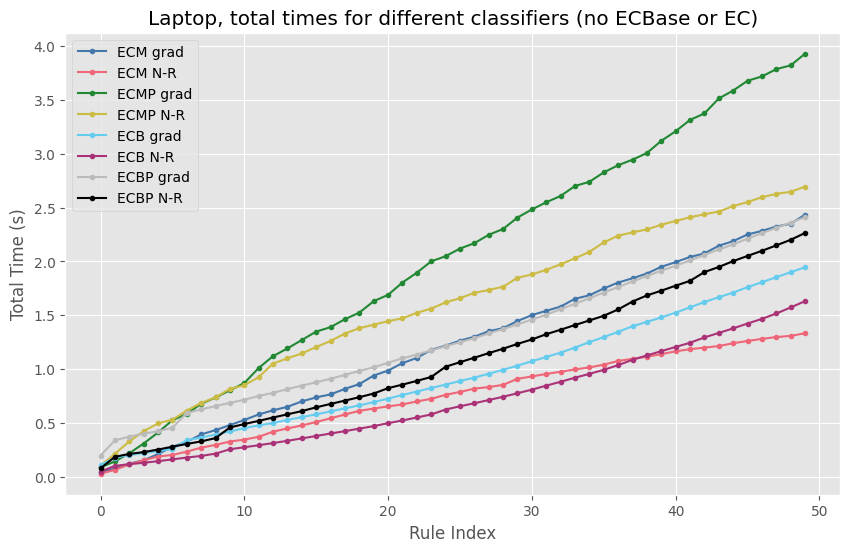

In [ ]:
# same but without ecbase
plt.figure(figsize=(10, 6))
plt.plot(ecmTrueTotalTimes, label='ECM grad', marker='.')
plt.plot(ecmFalseTotalTimes, label='ECM N-R', marker='.')
plt.plot(ecmpTrueTotalTimes, label='ECMP grad', marker='.')
plt.plot(ecmpFalseTotalTimes, label='ECMP N-R', marker='.')
plt.plot(ecbfTrueTotalTimes, label='ECB grad', marker='.')
plt.plot(ecbfFalseTotalTimes, label='ECB N-R', marker='.')
plt.plot(ecbfpTrueTotalTimes, label='ECBP grad', marker='.')
plt.plot(ecbfpFalseTotalTimes, label='ECBP N-R', marker='.')
plt.legend()
plt.xlabel('Rule Index')
plt.ylabel('Total Time (s)')
plt.title('Laptop, total times for different classifiers (no ECBase or EC)')
plt.show()

In [ ]:
# Prepare data for the table
algorithms = [
    ("ECBase", ecbaseTrueTotal, ecbaseFalseTotal),
    ("EC", ecTrueTotal, ecFalseTotal),
    ("ECM", ecmTrueTotal, ecmFalseTotal),
    ("ECMP", ecmpTrueTotal, ecmpFalseTotal),
    ("ECBF", ecbfTrueTotal, ecbfFalseTotal),
    ("ECBFP", ecbfpTrueTotal, ecbfpFalseTotal)
]

table_df = pd.DataFrame(
    [(name, true, false) for name, true, false in algorithms],
    columns=["Version", "use_gradient=True", "use_gradient=False"]
).set_index("Version")

table_df


,use_gradient=True,use_gradient=False
Version,,
ECBase,102.181840,49.474556
EC,96.513600,41.266248
ECM,2.466180,1.362421
ECMP,3.961908,2.727549
ECBF,1.975009,1.665058
ECBFP,2.441933,2.298372


In [ ]:
# save the ECxxxxTotalTimes to a csv file
total_times = {}
total_times['ECBase_True'] = ecbaseTrueTotalTimes.tolist()
total_times['ECBase_False'] = ecbaseFalseTotalTimes.tolist()
total_times['EC_True'] = ecTrueTotalTimes.tolist()
total_times['EC_False'] = ecFalseTotalTimes.tolist()
total_times['ECM_True'] = ecmTrueTotalTimes.tolist()
total_times['ECM_False'] = ecmFalseTotalTimes.tolist()
total_times['ECMP_True'] = ecmpTrueTotalTimes.tolist()
total_times['ECMP_False'] = ecmpFalseTotalTimes.tolist()
total_times['ECBF_True'] = ecbfTrueTotalTimes.tolist()
total_times['ECBF_False'] = ecbfFalseTotalTimes.tolist()
total_times['ECBFP_True'] = ecbfpTrueTotalTimes.tolist()
total_times['ECBFP_False'] = ecbfpFalseTotalTimes.tolist()
# save the total_times to a json file
import json
with open('z_desktop_total_times.json', 'w') as f:
    json.dump(total_times, f)

times = {}
times['ECBase_True'] = ecbaseTrueTimes.tolist()
times['ECBase_False'] = ecbaseFalseTimes.tolist()
times['EC_True'] = ecTrueTimes.tolist()
times['EC_False'] = ecFalseTimes.tolist()
times['ECM_True'] = ecmTrueTimes.tolist()
times['ECM_False'] = ecmFalseTimes.tolist()
times['ECMP_True'] = ecmpTrueTimes.tolist()
times['ECMP_False'] = ecmpFalseTimes.tolist()
times['ECBF_True'] = ecbfTrueTimes.tolist()
times['ECBF_False'] = ecbfFalseTimes.tolist()
times['ECBFP_True'] = ecbfpTrueTimes.tolist()
times['ECBFP_False'] = ecbfpFalseTimes.tolist()
# save the times to a json file
with open('z_desktop_times.json', 'w') as f:
    json.dump(times, f)

# save the final times to json
final_times = {}
final_times['ECBase_True'] = ecbaseTrueTotal
final_times['ECBase_False'] = ecbaseFalseTotal
final_times['EC_True'] = ecTrueTotal
final_times['EC_False'] = ecFalseTotal
final_times['ECM_True'] = ecmTrueTotal
final_times['ECM_False'] = ecmFalseTotal
final_times['ECMP_True'] = ecmpTrueTotal
final_times['ECMP_False'] = ecmpFalseTotal
final_times['ECBF_True'] = ecbfTrueTotal
final_times['ECBF_False'] = ecbfFalseTotal
final_times['ECBFP_True'] = ecbfpTrueTotal
final_times['ECBFP_False'] = ecbfpFalseTotal
# save the final_times to a json file
with open('z_desktop_final_times.json', 'w') as f:
    json.dump(final_times, f)